# Mall Customers Segmentation

## The Data

[Mall Customers data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) from Kaggle data set  is used here. 


### Imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading the data

In [36]:
customer_df = pd.read_csv('Mall_Customers.csv')

In [37]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
customer_df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83



### EDA

In [39]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
customer_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**We can convert the 'Gender' into categorical type.**

In [41]:
customer_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [42]:
customer_df['Gender'] = customer_df['Gender'].astype('category')

In [43]:
customer_df.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [44]:
customer_df.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [45]:
customer_df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### Visualisations

<Figure size 720x432 with 0 Axes>

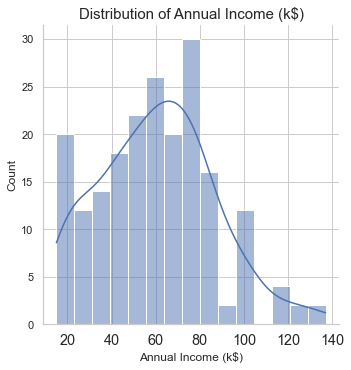

In [46]:
plt.figure(figsize=(10, 6))

sns.set(style = 'whitegrid')

sns.displot(data = customer_df['Annual Income (k$)']
            , height = 5
            , kind = 'hist'
            , kde = True
            , bins = 15)

plt.xticks(fontweight ='light'
           , fontsize ='large'
          )

plt.title('Distribution of Annual Income (k$)'
         , fontsize = 15)

plt.show()

**We can see that the annual income for most of the data falls between 40k dollars to 85k dollars.**

**Next let us see the age distribution.**

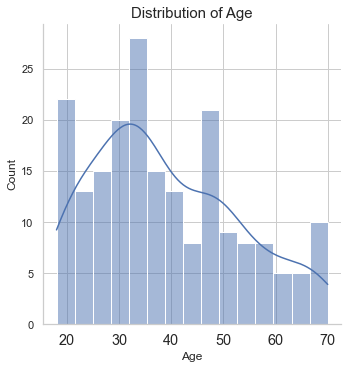

In [47]:
sns.displot(customer_df['Age']
           , height = 5
           , kde = True
           , bins = 15)

plt.xticks(fontweight = 'light'
           , fontsize = 'large'
          )

plt.title('Distribution of Age'
         , fontsize = 15)

plt.show()

**We can see that most of the customers are between the ages of 20 to 50**

**Let us also see the distribution of spending score**

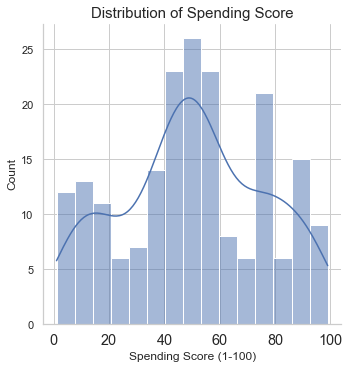

In [48]:
sns.displot(customer_df['Spending Score (1-100)']
           , height = 5
           , kde = True
           , bins = 15)

plt.xticks(fontweight = 'light'
           , fontsize = 'large'
          )

plt.title('Distribution of Spending Score'
         , fontsize = 15)

plt.show()

**Though there are a few outliers, we can see that the maximum spending score is between 40 and 60.**

**Let us see how the gender count is for the data.**

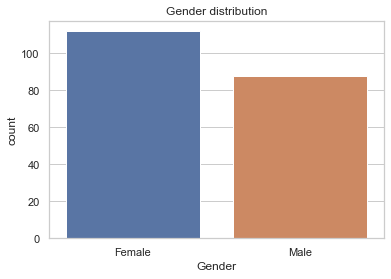

In [49]:
sns.countplot(data = customer_df
              , x = 'Gender')

plt.title('Gender distribution')

plt.show()

**We can look at age distribution by gender**

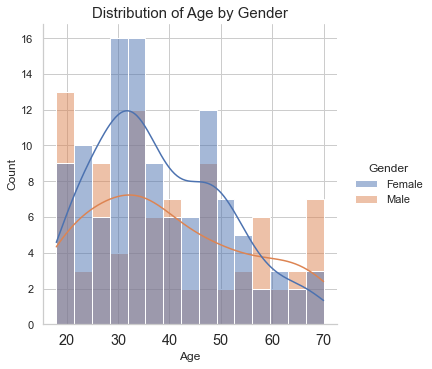

In [50]:
sns.displot(data = customer_df
            , x = 'Age'
           , height = 5
           , kde = True
           , bins = 15
           , hue = 'Gender')

plt.xticks(fontweight = 'light'
           , fontsize = 'large'
          )

plt.title('Distribution of Age by Gender'
         , fontsize = 15)

plt.show()

**We can also plot various scatter plots to see how the relationship between various features is.**

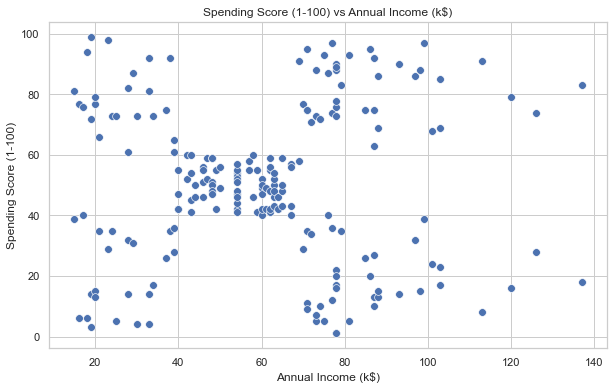

In [51]:
plt.figure(figsize=(10,6))

sns.scatterplot(x = 'Annual Income (k$)'
                , y = 'Spending Score (1-100)'
                , data = customer_df
                , s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()